# 1. Data Importing

In [183]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [184]:
ticker = yf.Ticker("RELIANCE.NS")
hist = ticker.history(period="max")
print(hist.index.min(),hist.index.max())

1996-01-01 00:00:00+05:30 2025-10-01 00:00:00+05:30


In [185]:
df=yf.download("RELIANCE.NS",period="max",auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [186]:
print("Raw Data",df.shape)
df.sample(5)

Raw Data (7470, 6)


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2014-10-31,214.105545,228.708893,229.428940,224.434387,224.434387,14086084
2019-12-20,715.362305,731.054749,739.489441,729.683228,738.323669,21271510
2006-08-08,97.256897,111.680023,111.971474,109.148468,109.205612,19332271
2006-11-29,124.344330,142.784485,144.658859,142.424469,143.447372,15458547
2015-07-30,216.716415,228.617462,230.411850,226.823090,228.606033,11701228


# 2. Data Preprocessing

In [187]:
df=df.reset_index()
df.columns

MultiIndex([(     'Date',            ''),
            ('Adj Close', 'RELIANCE.NS'),
            (    'Close', 'RELIANCE.NS'),
            (     'High', 'RELIANCE.NS'),
            (      'Low', 'RELIANCE.NS'),
            (     'Open', 'RELIANCE.NS'),
            (   'Volume', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])

In [188]:
df.columns=['Date','Adj Close','Close','High','Low','Open','Volume']
df.sample(5)

,Date,Adj Close,Close,High,Low,Open,Volume
7170,2024-07-23,1476.968262,1487.900024,1505.750000,1463.000000,1501.000000,18052044
5155,2016-05-24,206.074783,214.971054,215.782516,212.136612,212.136612,12283217
3621,2010-03-04,206.093369,231.783340,237.726501,230.411850,237.726501,20781218
5209,2016-08-09,225.850677,235.600677,236.469299,233.383423,234.754929,13290768
4994,2015-09-22,183.726318,193.815674,202.273254,193.038498,201.153198,15745524


In [189]:
beginning_cols=['Date','Open','Close','Adj Close']
later_cols=[c for c in df.columns if c not in beginning_cols]
df=df[beginning_cols+later_cols]

In [190]:
df.sample(5)

,Date,Open,Close,Adj Close,High,Low,Volume
4983,2015-09-04,194.227127,191.072678,181.126068,194.227127,188.603973,16199949
3524,2009-10-08,251.441498,242.258163,214.010025,255.498856,240.012344,61481645
3215,2008-07-01,241.155258,233.629150,206.387177,245.612625,231.594757,51852931
4329,2013-01-10,196.067215,194.307129,177.976227,196.341522,193.609955,9239813
2977,2007-07-17,204.467651,208.907883,183.581879,210.159378,203.450455,31204282


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470 entries, 0 to 7469
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7470 non-null   datetime64[ns]
 1   Open       7470 non-null   float64       
 2   Close      7470 non-null   float64       
 3   Adj Close  7470 non-null   float64       
 4   High       7470 non-null   float64       
 5   Low        7470 non-null   float64       
 6   Volume     7470 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 408.6 KB


In [192]:
df.describe()

,Date,Open,Close,Adj Close,High,Low,Volume
count,7470,7470.000000,7470.000000,7470.000000,7470.000000,7470.000000,7.470000e+03
mean,2010-09-13 18:08:46.265060096,347.377565,347.108820,334.986346,351.148269,343.358536,5.845127e+07
min,1996-01-01 00:00:00,5.462565,5.487558,3.449042,5.487558,5.428648,0.000000e+00
25%,2003-02-26 06:00:00,25.603546,25.571413,19.648740,26.023949,25.179573,1.339291e+07
50%,2010-08-14 12:00:00,199.650261,199.330246,183.216530,201.918945,196.832977,2.355624e+07
75%,2018-03-12 18:00:00,426.976234,426.707649,412.300720,431.536461,422.490295,6.079910e+07
max,2025-10-01 00:00:00,1604.449951,1600.900024,1589.138062,1608.800049,1585.500000,1.448889e+09
std,NaN,424.152183,423.921206,422.836071,427.999725,420.123696,1.012743e+08


Text(0, 0.5, 'Adj Close Price')

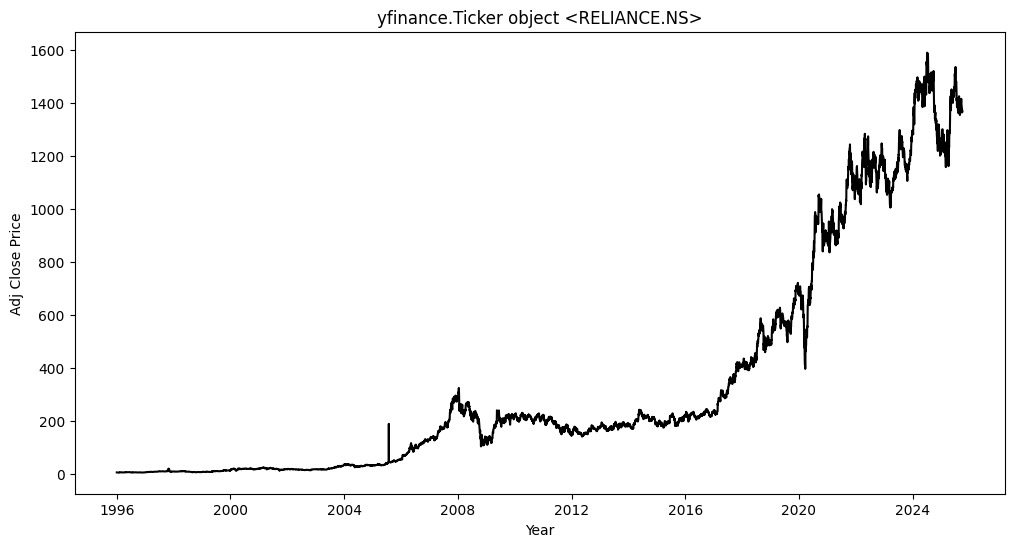

In [193]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Adj Close'],c='black')
plt.title(ticker)
plt.xlabel("Year")
plt.ylabel("Adj Close Price")

In [194]:
df_sample=df.copy()

# 3. Feature Engineering

#### 1. MACD
#### 2. RSI
#### 3. Daily % Return
#### 4. MA's
#### 5. Close Lags

In [205]:
# Calculate MACD
 
          #short_term=12
          #long_term=26
          #signal_period=9

# Calculate short-term and long-term EMAs

          #short_ema=df['Close'].ewm(span=short_term,adjust=False).mean()
          #long_ema=df['Close'].ewm(span=long_term,adjust=False).mean()

# Calculate MACD Line

          #macd_line=short_ema-long_ema

# Calculate Signal Line

          #signal_line=macd_line.ewm(span=signal_period,adjust=False).mean()

# Calculate MACD Histogram

          #macd_histogram=macd_line-signal_line

# Add MACD components to the DataFrame

          #df['MACD']=macd_line
          #df['Signal']=signal_line
          #df['Histogram']=macd_histogram

In [196]:
from ta.trend import MACD
from ta.momentum import RSIIndicator
# 1. MACD
# adds MACD Line,Signal Line and MACD histogram
macd_indicator=MACD(close=df_sample['Adj Close'],window_fast=12,window_slow=26,window_sign=9,fillna=False)

df_sample['MACD_Line']=macd_indicator.macd()
df_sample['MACD_Signal']=macd_indicator.macd_signal()
df_sample['MACD_Histogram']=macd_indicator.macd_diff()

In [197]:
# 2. RSI
rsi_indicator=RSIIndicator(close=df_sample['Adj Close'],window=14,fillna=False)

df_sample['RSI_14']=rsi_indicator.rsi()

In [198]:
df_sample.sample(9)

,Date,Open,Close,Adj Close,High,Low,Volume,MACD_Line,MACD_Signal,MACD_Histogram,RSI_14
5852,2019-03-18,608.488403,617.197449,600.345520,620.809082,607.574097,22104063,13.817594,10.029272,3.788322,69.186753
5238,2016-09-22,247.555588,248.915649,238.614655,250.481445,246.641251,18761415,3.533949,2.646994,0.886955,66.465491
398,1997-07-10,13.138720,13.104802,8.951627,13.281532,13.013760,345238055,0.331484,0.383284,-0.051800,65.594454
5175,2016-06-21,227.234543,225.634460,216.296906,227.245972,223.942947,13933068,0.549111,-0.374214,0.923325,56.927468
7016,2023-12-04,1225.000000,1210.099976,1201.209229,1225.000000,1199.300049,15590990,9.922711,6.922235,3.000476,65.171686
123,1996-06-20,8.104591,8.184923,5.376712,8.220626,8.015333,284643785,0.002359,0.046313,-0.043954,42.079155
2476,2005-07-07,45.799866,43.839767,37.744492,45.799866,43.507732,122340039,1.256660,1.489234,-0.232575,51.869397
2099,2004-01-19,41.497650,41.754711,34.381466,42.058186,40.637207,78038244,1.177581,1.270755,-0.093174,63.012169
3520,2009-10-01,251.430069,248.509918,219.532806,251.430069,246.184082,26342402,4.052055,3.662020,0.390035,60.336267


In [199]:
# 3. Daily % Return
df_sample['Daily % Return']=100*(df_sample['Close']-df_sample['Close'].shift(1))/df_sample['Close'].shift(1)

In [200]:
# 4. MA (Moving Averages)
ma_windows=[10,20,50,100,200]
for w in ma_windows:
    df_sample[f'SMA_{w}']=df_sample['Adj Close'].rolling(window=w).mean()           # SMA features
    df_sample[f'EMA_{w}']=df_sample['Adj Close'].ewm(span=w,adjust=False).mean()    # EMA features

df_sample=df_sample.fillna(0)

In [215]:
# 5. Close Lags
def create_lags(data,column='Close',lags=[2,5,7,14]):
    for lag in lags:
        data[f'{column}_LAG{lag}']=data[column].shift(lag)
    return data

lags=[1,2,3,5,7,14]
df_sample=create_lags(df_sample,column='Close',lags=lags)
df_sample=df_sample.dropna()

In [216]:
df_sample

,Date,Open,Close,Adj Close,High,Low,Volume,MACD_Line,MACD_Signal,MACD_Histogram,...,SMA_100,EMA_100,SMA_200,EMA_200,Close_LAG1,Close_LAG2,Close_LAG3,Close_LAG5,Close_LAG7,Close_LAG14
14,1996-01-19,6.114146,6.090939,3.828280,6.190908,6.049881,324535340,0.000000,0.000000,0.000000,...,0.000000,4.524040,0.000000,4.568520,6.199833,6.376563,6.640766,6.697891,6.564004,7.345901
15,1996-01-22,6.110576,6.194478,3.893356,6.274810,6.105220,338613971,0.000000,0.000000,0.000000,...,0.000000,4.511551,0.000000,4.561802,6.090939,6.199833,6.376563,6.628270,6.769297,7.288776
16,1996-01-23,6.215900,5.932061,3.728422,6.242677,5.605378,354919302,0.000000,0.000000,0.000000,...,0.000000,4.496043,0.000000,4.553509,6.194478,6.090939,6.199833,6.640766,6.697891,7.344116
17,1996-01-24,5.880291,5.728553,3.600512,5.915994,5.641081,351185727,0.000000,0.000000,0.000000,...,0.000000,4.478310,0.000000,4.544027,5.932061,6.194478,6.090939,6.376563,6.628270,7.276280
18,1996-01-25,5.716057,5.487558,3.449042,5.741049,5.453640,360855771,0.000000,0.000000,0.000000,...,0.000000,4.457928,0.000000,4.533131,5.728553,5.932061,6.194478,6.199833,6.640766,7.226296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7465,2025-09-25,1381.300049,1372.400024,1372.400024,1384.500000,1369.000000,11411143,-1.433486,-1.239952,-0.193534,...,1421.620132,1392.063052,1336.313365,1374.430214,1383.000000,1389.800049,1390.599976,1415.000000,1405.300049,1375.000000
7466,2025-09-26,1372.000000,1377.599976,1377.599976,1382.699951,1366.000000,9879109,-2.299547,-1.451871,-0.847676,...,1421.382102,1391.776654,1336.802672,1374.461754,1372.400024,1383.000000,1389.800049,1407.400024,1413.800049,1378.500000
7467,2025-09-29,1381.599976,1372.800049,1372.800049,1389.000000,1368.000000,14231999,-3.334779,-1.828453,-1.506326,...,1421.392888,1391.400880,1337.301096,1374.445219,1377.599976,1372.400024,1383.000000,1390.599976,1415.000000,1376.199951
7468,2025-09-30,1377.099976,1364.000000,1364.000000,1377.099976,1362.800049,14604684,-4.809853,-2.424733,-2.385120,...,1420.725033,1390.858288,1337.831714,1374.341287,1372.800049,1377.599976,1372.400024,1389.800049,1407.400024,1377.000000


# 4. EDA

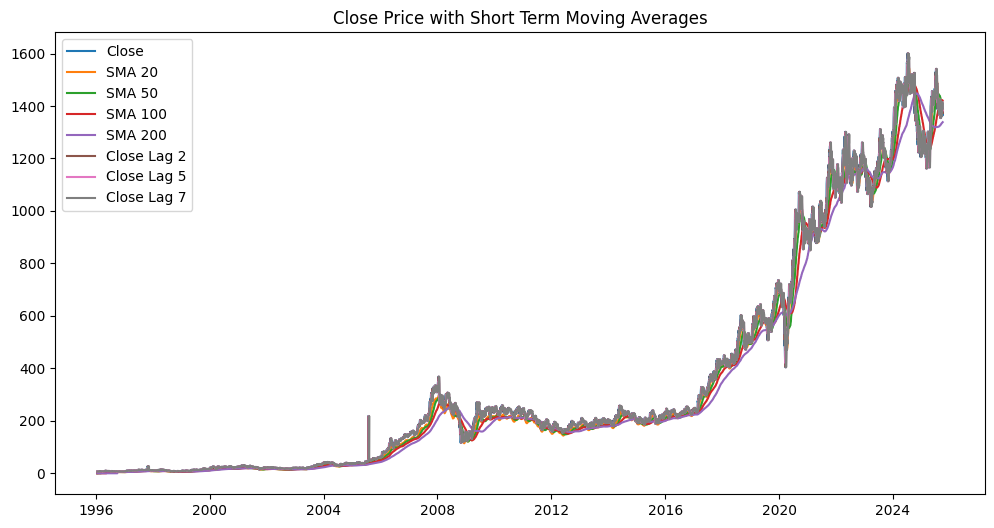

In [219]:
plt.figure(figsize=(12,6))
plt.plot(df_sample['Date'],df_sample['Close'],label='Close')
plt.plot(df_sample['Date'],df_sample['SMA_20'],label='SMA 20')
plt.plot(df_sample['Date'],df_sample['SMA_50'],label='SMA 50')
plt.plot(df_sample['Date'],df_sample['SMA_100'],label='SMA 100')
plt.plot(df_sample['Date'],df_sample['SMA_200'],label='SMA 200')
plt.plot(df_sample['Date'],df_sample['Close_LAG2'],label='Close Lag 2')
plt.plot(df_sample['Date'],df_sample['Close_LAG5'],label='Close Lag 5')
plt.plot(df_sample['Date'],df_sample['Close_LAG7'],label='Close Lag 7')
#plt.plot(df_sample['Date'],df_sample['Close_LAG14'],label='Close Lag 14')
plt.title("Close Price with Short Term Moving Averages")
plt.legend()

<BarContainer object of 7456 artists>

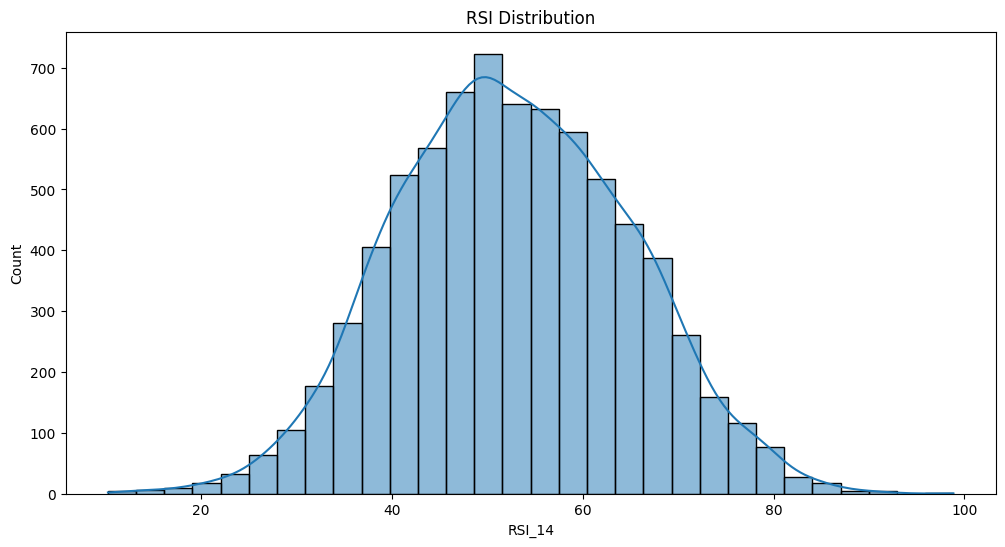

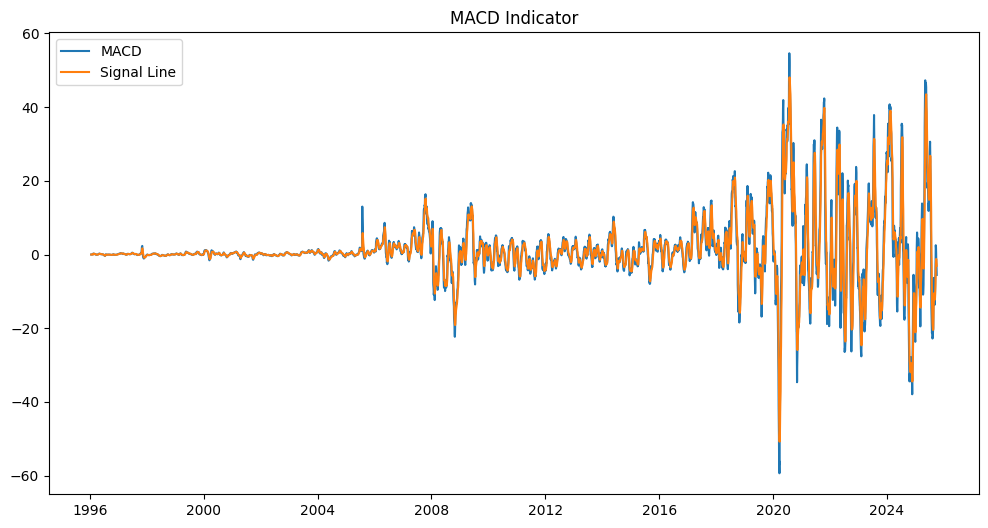

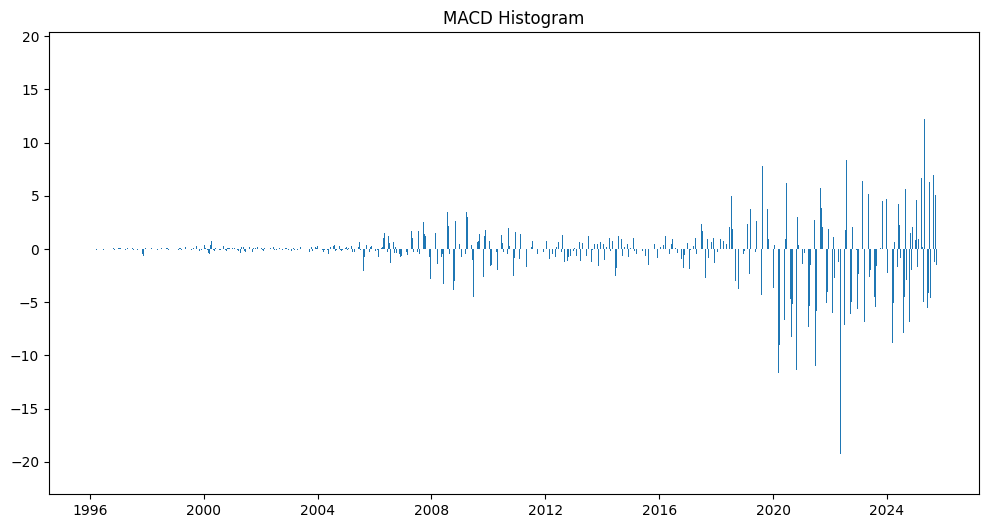

In [220]:
plt.figure(figsize=(12,6))
plt.title("RSI Distribution")
sns.histplot(df_sample['RSI_14'],bins=30,kde=True)

plt.figure(figsize=(12,6))
plt.title("MACD Indicator")
plt.plot(df_sample['Date'],df_sample['MACD_Line'],label='MACD')
plt.plot(df_sample['Date'],df_sample['MACD_Signal'],label='Signal Line')
plt.legend()

plt.figure(figsize=(12,6))
plt.title("MACD Histogram")
plt.bar(df_sample['Date'],df_sample['MACD_Histogram'],label='Histogram')

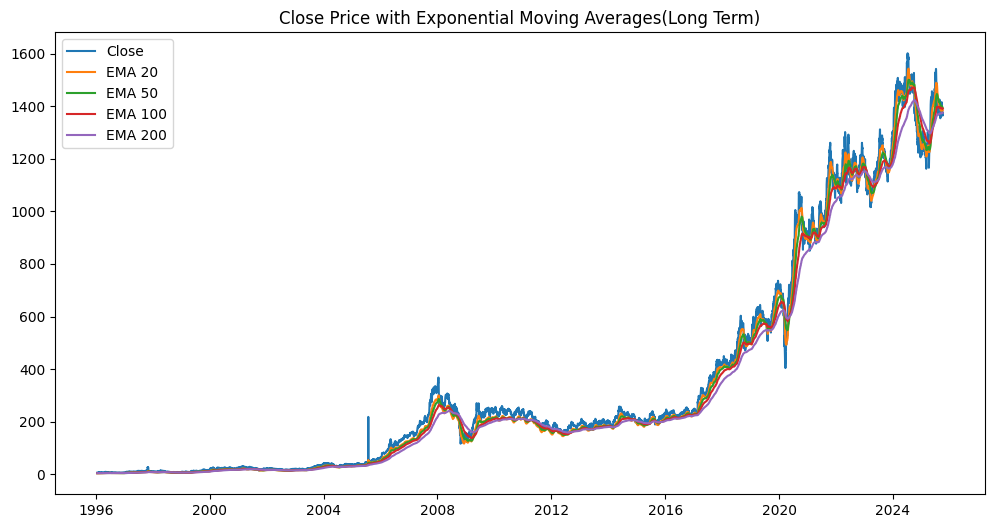

In [221]:
plt.figure(figsize=(12,6))
plt.plot(df_sample['Date'],df_sample['Close'],label='Close')
plt.plot(df_sample['Date'],df_sample['EMA_20'],label='EMA 20')
plt.plot(df_sample['Date'],df_sample['EMA_50'],label='EMA 50')
plt.plot(df_sample['Date'],df_sample['EMA_100'],label='EMA 100')
plt.plot(df_sample['Date'],df_sample['EMA_200'],label='EMA 200')
plt.title("Close Price with Exponential Moving Averages(Long Term)")
plt.legend()

In [222]:
df_sample.to_csv('Data Complete.csv')